## 2-Dimensional Gaussian Mixture

In [4]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from itertools import chain
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
import pandas as pd

In [15]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    
    """
    Draw an ellipse with a given position and covariance
    
    """
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def plot_bivariate_mixture(means, covs, weights, N = 10000, seed=10):
    
    """
    returns the simulated 2d dataset X and a scatter plot is shown
    
    """
    np.random.seed(seed)
    if not len(means)==len(covs)==len(weights):
        raise Exception("Length of mean, std, and weights don't match.") 
    K = len(means)
    M = len(means[0])
    
    mixture_idx = np.random.choice(K, size=N, replace=True, p=weights)
    
    # generate N possible values of the mixture
    X = np.fromiter(chain.from_iterable(multivariate_normal.rvs(mean=means[i], cov=covs[i]) for i in mixture_idx), 
                dtype=float)
    X.shape = N, M
    
    xs1 = X[:,0] 
    xs2 = X[:,1]
    
    plt.scatter(xs1, xs2, label="data")
    
    L = len(means)
    for l, pair in enumerate(means):
        plt.scatter(pair[0], pair[1], color='red')
        if l == L-1:
            break
    plt.scatter(pair[0], pair[1], color='red', label="mean")
    
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("Scatter plot of the bivariate Gaussian mixture")
    plt.legend()
    plt.show()
    
    return X

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\scipy\stats\_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


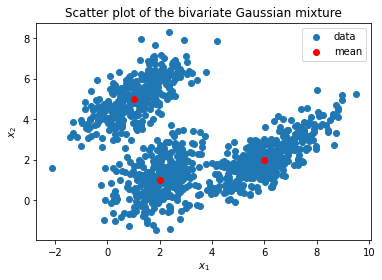

In [16]:
mean = [(1,5), (2,1), (6,2)]
cov1 = np.array([[0.5, 1.0],[1.0, 0.8]])
cov2 = np.array([[0.8, 0.4],[0.4, 1.2]])
cov3 = np.array([[1.2, 1.3],[1.3, 0.9]])
cov = [cov1, cov2, cov3]
weights = [0.3, 0.3, 0.4]

X4 = plot_bivariate_mixture(means=mean, covs=cov, weights=weights, N=1000) 


In [9]:
print("The dataset we generated has a shape of", X4.shape)

The dataset we generated has a shape of (1000, 2)


## Fit a GMM

In [10]:
gm = GaussianMixture(n_components=3, random_state=0).fit(X4)
print("Means of the 3 Gaussians fitted by GMM are\n")
print(gm.means_)

Means of the 3 Gaussians fitted by GMM are

[[6.04604662 2.09240305]
 [1.03001237 5.06474182]
 [1.96896645 1.06713977]]


c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [11]:
print("Covariances of the 3 Gaussians fitted by GMM are")
gm.covariances_

Covariances of the 3 Gaussians fitted by GMM are


array([[[1.35504595, 0.95174633],
        [0.95174633, 1.07754146]],

       [[1.05182922, 0.76756169],
        [0.76756169, 1.17282816]],

       [[0.71325994, 0.3583451 ],
        [0.3583451 , 1.13319153]]])

c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


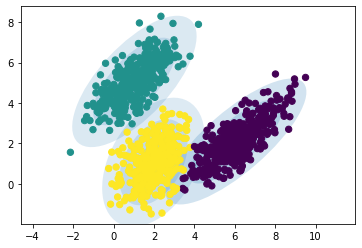

In [17]:
plot_gmm(GaussianMixture(n_components=3, random_state=0), # the model, 
          X4) # simulated Gaussian mixture data

c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


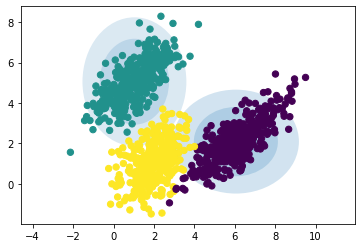

In [18]:
# try Covariance_type = 'tied'
plot_gmm(GaussianMixture(n_components=3, covariance_type='tied',random_state=0), # the model, 
         X4)

# Exercise

In [5]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/customers.csv")
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent,Living_Status,Children
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1617,0,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,27,0,2
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,776,1,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,53,1,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,422,1,1


In [6]:
data.shape

(2216, 19)

In [7]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(data)